### The Curse of Dimensionality


##### 1. Background Information
The k-Nearest Neighbours (kNN) ML algorithm is based on the assumption that similar datapoints have similar labels. Thus, datapoints that are close to one another should share the same label. The kNN algorithm works by computing the distances (euclidian) between our new datapoint $\mathbf{x_t}$ that we want to classify and the k-th number of datapoints from our dataset that are the closes to  $\mathbf{x_t}$. The algorithm then determines the classification of $\mathbf{x_t}$ by determining which label $y$ is most probable, based on the frequency of labels we have in our k-th nearest neighbors space. 


Assuming a uniform distribution, the length of the space that our k-th nearest neighbours fit into can be defined as: <br>
<center> $l = (\frac{k}{n})^\frac{1}{d}$ <center>
       
    
Basically: the equation above is derived from the assumption that if our dataset is uniformly distributed in our n-dimensional space, the n-dimensional volume can be assumed to be the ratio of the the number of our k-th nearest neighbours to the number of datapoints in our dataset $n$.
    
Now, as the number of dimensions of $\mathbf{X}$ increases, the length of the space that includes our k nearest neighbour increases pretty fast, based on the equation above. This is the curse of dimensionality. As our dimensions increase, our neighbouring datapoints are so far away that classifying our new datapoint based on our nearest neighbours is misleading.


##### 2. Visualizing the Curse of Dimensionality
In this Jupyter notebook, I aim to visualize the curse of dimensionality by examining the distribution of the euclidian distance from a dataset to a new datapoint $\mathbf{x_t}$ with varying dimensions.

In [1]:
#import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

In [2]:
#create a random matrix with uniform distribution
np.random.seed(0)
random_matrix = pd.DataFrame(np.random.uniform(0,1, size=(100,10000)))

In [3]:
#specifying our new point
new_point = random_matrix.iloc[-1]

#dropping the new point from the original matrix
random_matrix = random_matrix.iloc[0:-1]

In [4]:
#create a function to calculate the euclidean distance
def euclidian_distance(df, dimensions):
    obs = df.loc[:, 0:(dimensions-1)]
    point = new_point.loc[0:(dimensions-1)]
    dist_sq_sum = 0
    for i in range(0,dimensions):
        dist_sq_sum += ((point[i] - obs[i])**2)
    return (np.sqrt(dist_sq_sum))

In [5]:
#create dataframe for results
distance = pd.DataFrame()

#populate distance dataframe for varying dimensions
distance['Dim2'] = euclidian_distance(random_matrix,2)
distance['Dim3'] = euclidian_distance(random_matrix,3)
distance['Dim5'] = euclidian_distance(random_matrix,5)
distance['Dim10'] = euclidian_distance(random_matrix,10)
distance['Dim100'] = euclidian_distance(random_matrix,100)
distance['Dim1000'] = euclidian_distance(random_matrix,1000)
distance['Dim10000'] = euclidian_distance(random_matrix,10000)

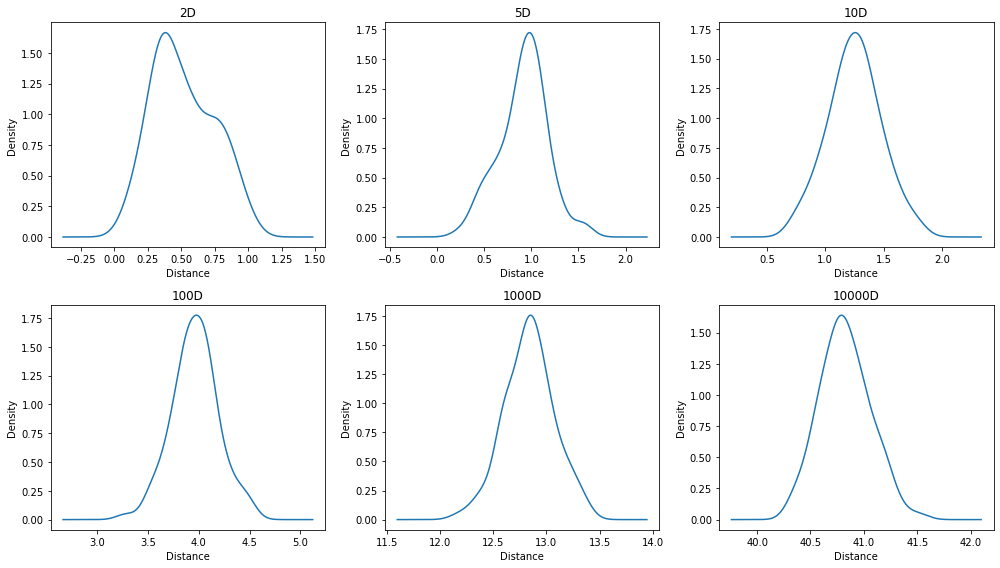

In [6]:
#plotting the distance distribution for the different dimensions
fig, ax = plt.subplots(2,3)
fig.set_figheight(8)
fig.set_figwidth(14)

pd.DataFrame(distance.Dim2).plot(kind='kde', legend=False, ax=ax[0,0], title='2D')
pd.DataFrame(distance.Dim5).plot(kind='kde', legend=False, ax=ax[0,1], title='5D')
pd.DataFrame(distance.Dim10).plot(kind='kde', legend=False, ax=ax[0,2], title='10D')
pd.DataFrame(distance.Dim100).plot(kind='kde', legend=False, ax=ax[1,0], title='100D')
pd.DataFrame(distance.Dim1000).plot(kind='kde', legend=False, ax=ax[1,1], title='1000D')
pd.DataFrame(distance.Dim10000).plot(kind='kde', legend=False, ax=ax[1,2], title='10000D')


for i in range(3):
    for j in range(2):
        ax[j,i].set_xlabel('Distance')

fig.tight_layout()

From the figures above, we can see that as our dimensions increase, so does our distance distribution range. For 2D space, our distance ranged between 0 and 1.1, however for 10,000D space the distances lie between 40 and 41.5.

Let's plot these distributions on the same graph to compare them and visualize the difference between the different distributions.

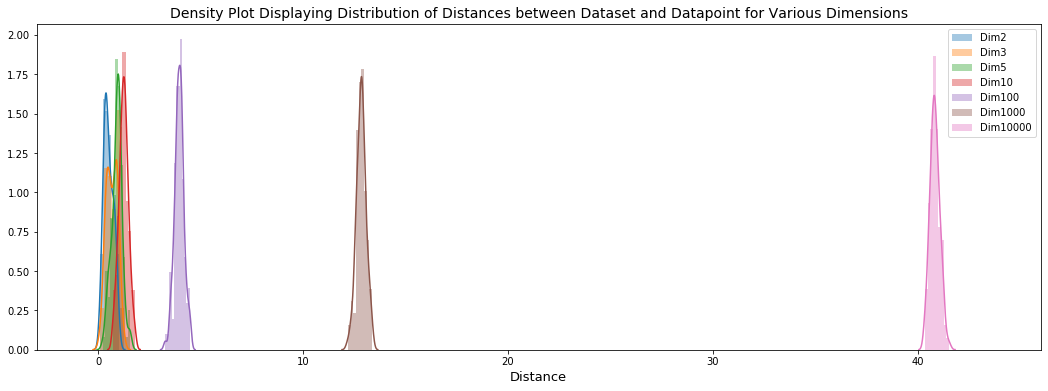

In [7]:
#plotting distributions on the same graph
plt.figure(figsize=(18,6))
for dim in distance.columns:
    sns.distplot(distance[dim], hist=True)
plt.xlabel('Distance', fontsize=13)
plt.legend(labels=distance.columns)
plt.title('Density Plot Displaying Distribution of Distances between Dataset and Datapoint for Various Dimensions', fontsize=14)
plt.xlim(-3, 46);

From the graph above, we can clearly see that as our dimensions increase, the distance between our new datapoint and dataset exponentially increases. Thus visually proving the curse of dimensionality.